In [1]:
%run ./useful.py
%matplotlib inline

In [2]:
ip_list = ['85','86','87','88','89']
for ssh_ip in ip_list:
    for cmd_ip in ip_list:
        if ssh_ip != cmd_ip:
            ping_cmd = '/persistant/nmap/nping/nping 128.232.97.'+cmd_ip+' -c 1000 --delay 0.001s --tcp'
            ssh = ssh_connect('128.232.97.'+ssh_ip)
            for i in range(10):
                with open('./ping/nping_mod_tcp_'+ssh_ip+'_to_'+cmd_ip+"_"+str(i),'w+') as f:
                    output = ssh_cmd(ping_cmd+' | grep -e "packet rtt:"',ssh)
                    f.write(output)
            ssh.close()

In [7]:
rtts = getrtts_nping_mod("./ping", "nping_mod_tcp", "85", "86")
print(rtts)

[[15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16

In [3]:
med_mat = np.zeros((len(ip_list),len(ip_list)))
mean_mat = np.zeros((len(ip_list),len(ip_list)))
low_mat = np.zeros((len(ip_list),len(ip_list)))
high_mat = np.zeros((len(ip_list),len(ip_list)))

for i in range(len(ip_list)):
    for j in range(len(ip_list)):
        if ip_list[i] != ip_list[j]:
            rtts = getrtts_nping_mod("./ping", "nping_mod_tcp", ip_list[i], ip_list[j])
            low_mat[i][j] = round(get_conf_int(rtts)[0],4)
            med_mat[i][j] = round(get_conf_int(rtts)[1],4)
            high_mat[i][j] = round(get_conf_int(rtts)[2],4)
            mean_mat[i][j] = round(get_mean(rtts),4)
        else:
            med_mat[i][j] = None
            mean_mat[i][j] = None
            low_mat[i][j] = None
            high_mat[i][j] = None
            

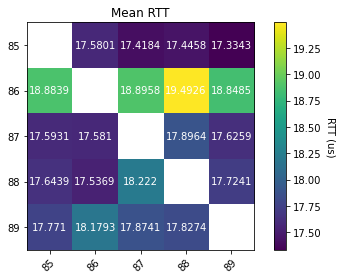

In [4]:
heatmap(mean_mat,ip_list,title="Mean RTT", colbarlab="RTT (us)")

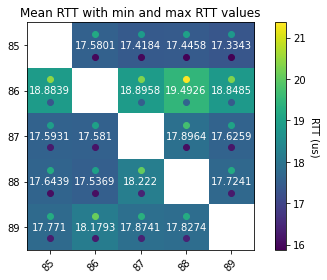

In [5]:
heatmap_conf_int(mean_mat,low_mat,high_mat,ip_list, title="Mean RTT with min and max RTT values", colbarlab="RTT (us)")

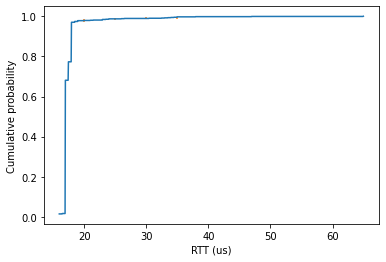

In [7]:
rtt_cumulative_graph("./ping", "nping_mod_tcp", "85", "86", 5.0, 1000, nping=True)